In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image

In [34]:
images_input_folder='./train/without_mask/'
for filename in os.listdir(images_input_folder):
        img_path = os.path.join(images_input_folder, filename)
        if img_path == './train/without_mask/.DS_Store':
            continue
      
        img = Image.open(img_path).convert('L')
        img.save('./train/'+filename+'.jpg')
print('success')            
     

success


In [49]:
# define paths
data_folder = './data/'
data_to_be_prepared_folder = os.path.join(data_folder, 'all_data_3')
final_data_mask_folder = os.path.join(data_folder, 'with_mask_33')
final_data_no_mask_folder = os.path.join(data_folder, 'without_mask_32')

# define face cascade
face_cascade = cv2.CascadeClassifier('face.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

def extract_all_faces(images_input_folder, faces_output_folder, counter_start, mask=True):
    i = counter_start
    for filename in os.listdir(images_input_folder):
        img_path = os.path.join(images_input_folder, filename)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #read image in gray scale
            faces = face_cascade.detectMultiScale(img, 1.2, 5) #detect faces
        except:
            continue
        for (x,y,w,h) in faces:
            sub_img = img[y:y+h, x:x+w] #take part of image that contains the face only
            output_img_path = os.path.join(faces_output_folder, '{}{}.jpg'.format('with_mask' if mask else 'without_mask', i))
            cv2.imwrite(output_img_path, sub_img) #save part of image that contains the face only
            i += 1
    print('Success :)')

In [50]:
# extract faces with no masks
extract_all_faces(data_to_be_prepared_folder, final_data_mask_folder, 100, False)

Success :)


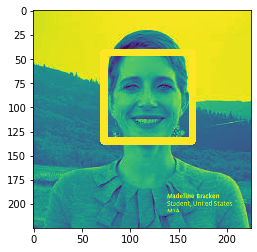

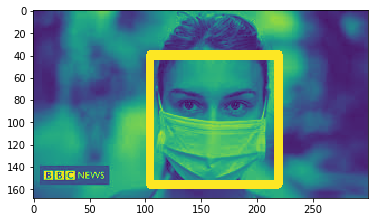

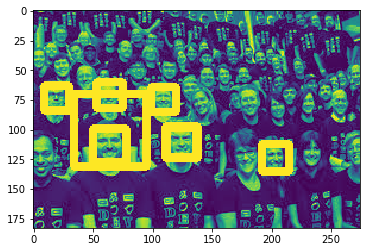

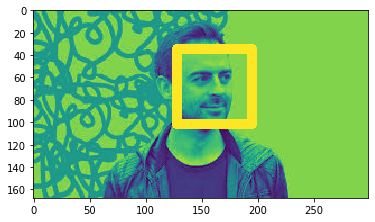

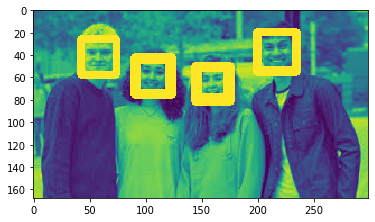

In [10]:

data_to_be_prepared_folder = './data/all_data'
face_cascade = cv2.CascadeClassifier('face.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


def detect_and_draw(cascade, image):
    detected = cascade.detectMultiScale(image)
    for (x,y,w,h) in detected:
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 5)

i=0
for filename in os.listdir(data_to_be_prepared_folder):
    img_path = os.path.join(data_to_be_prepared_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    detect_and_draw(face_cascade, img)
    detect_and_draw(eye_cascade, img)
    plt.imshow(img)
    plt.show()
    i += 1
    if i==5: break